## 1. Import Relevant Libraries and Reading In of Data

* 1a. Importing Relevant Libraries

In [2]:
# Import Required Libaries
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
from keras.layers import Bidirectional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import math 

* 1b. Reading in the Data:
<br><i> > Training Data
<br> > Testing Data
<br> > True Labels (RUL) for the Testing Data

> Insert your file path here:

In [7]:
# FD001 (Dataset 1)
train1 = "/Users/vickiyew/Documents/Capstone/Data Set/train_FD001.txt"
test1 = "/Users/vickiyew/Documents/Capstone/Data Set/test_FD001.txt"
truth1 = "/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD001.txt"

# FD002 (Dataset 2)
train2 = "/Users/vickiyew/Documents/Capstone/Data Set/train_FD002.txt"
test2 = "/Users/vickiyew/Documents/Capstone/Data Set/test_FD002.txt"
truth2 = "/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD002.txt"

# FD003 (Dataset 3)
train3 = "/Users/vickiyew/Documents/Capstone/Data Set/train_FD003.txt"
test3 = "/Users/vickiyew/Documents/Capstone/Data Set/test_FD003.txt"
truth3 = "/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD003.txt"

# FD004 (Dataset 4)
train4 = "/Users/vickiyew/Documents/Capstone/Data Set/train_FD004.txt"
test4 = "/Users/vickiyew/Documents/Capstone/Data Set/test_FD004.txt"
truth4 = "/Users/vickiyew/Documents/Capstone/Data Set/RUL_FD004.txt"


> Read in data (.txt files)

In [8]:

# For FD001
# Train Data 
train1_df = pd.read_csv(train1, sep=" ", header=None)
# Test Data
test1_df = pd.read_csv(test1, sep=" ", header=None)
# True RUL Data for the Test Set
truth1_df = pd.read_csv(truth1, sep=" ", header=None)

# For FD002
# Train Data 
train2_df = pd.read_csv(train2, sep=" ", header=None)
# Test Data
test2_df = pd.read_csv(test2, sep=" ", header=None)
# True RUL Data for the Test Set
truth2_df = pd.read_csv(truth2, sep=" ", header=None)


# For FD003
# Train Data 
train3_df = pd.read_csv(train3, sep=" ", header=None)
# Test Data
test3_df = pd.read_csv(test3, sep=" ", header=None)
# True RUL Data for the Test Set
truth3_df = pd.read_csv(truth3, sep=" ", header=None)


# For FD004
# Train Data 
train4_df = pd.read_csv(train4, sep=" ", header=None)
# Test Data
test4_df = pd.read_csv(test4, sep=" ", header=None)
# True RUL Data for the Test Set
truth4_df = pd.read_csv(truth4, sep=" ", header=None)

* 1c. We set a seed for Reproducibility of Results

In [9]:
np.random.seed(1234)  
PYTHONHASHSEED = 0

* 1d. We create a path to save the Deep Learning model output 

> Insert your file path to save the model

In [5]:
path_save_model = '/content/Output/regression_model.h5'

In [6]:
# define a path to save model
model_path = path_save_model

## 2. Data Preprocessing
- Dealing with Missing Values: Drop the last 2 columns, because they consist of all null values
- Rename columns according to the Engine ID, Cycle, the 3 respective Operating Settings and the 21 Operating Sensors. This aids in better readability and interpretability of the dataset.
- Derive RUL labels from the train data. This is because the RUL for the train data is not explicity provided.
- MinMax Normalisation to transform our features' values to a value between 0 and 1; For every feature, the minimum value of the feature would be transformed to a value of 0, and the maximum value of the feature would be transformed to a value of 1. 
- Contextual handling of RUL: Clipping the upper limit of the RUL of aircrafts to mimic a more accurate degradation pattern of the aircraft engine with increasing usage.
- Transform the input data into a form (3-Dimensional Form) that can be fed into the deep learning model. 

* 2a. Dealing with Missing Values: Drop the last 2 columns for Training, Testing and True Labels Dataframes
> This is because the last 2 columns consists of all null values.

In [10]:
# Drop the last 2 columns for Train, Test and True RUL Dataframes

# FD001
train1_df.drop(train1_df.columns[[26, 27]], axis=1, inplace=True)
test1_df.drop(test1_df.columns[[26, 27]], axis=1, inplace=True)
truth1_df.drop(truth1_df.columns[[1]], axis=1, inplace=True)

# FD002
train2_df.drop(train2_df.columns[[26, 27]], axis=1, inplace=True)
test2_df.drop(test2_df.columns[[26, 27]], axis=1, inplace=True)
truth2_df.drop(truth2_df.columns[[1]], axis=1, inplace=True)

# FD003
train3_df.drop(train3_df.columns[[26, 27]], axis=1, inplace=True)
test3_df.drop(test3_df.columns[[26, 27]], axis=1, inplace=True)
truth3_df.drop(truth3_df.columns[[1]], axis=1, inplace=True)

# FD004
train4_df.drop(train4_df.columns[[26, 27]], axis=1, inplace=True)
test4_df.drop(test4_df.columns[[26, 27]], axis=1, inplace=True)
truth4_df.drop(truth4_df.columns[[1]], axis=1, inplace=True)

* 2b. Rename Columns in this form for better readability and interpretability of the dataset: 
<br><i>-> Engine ID
<br>-> 3 Operating Settings
<br>-> 21 Sensors

In [11]:
# Rename columns into readable forms, namely, by: 
# [Engine ID, Operational Settings, Sensors]

# FD001
train1_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train1_df = train1_df.sort_values(['id','cycle'])


test1_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

# FD002
train2_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train2_df = train2_df.sort_values(['id','cycle'])


test2_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

# FD003
train3_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train3_df = train3_df.sort_values(['id','cycle'])


test3_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

# FD004
train4_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
train4_df = train4_df.sort_values(['id','cycle'])


test4_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']                                          

* 2c. Derive RUL labels for the Training Data
<br><i> This is because the RUL for the Training Data is not explicity provided.

Since this dataset is a simulated run-to-failure dataset, the last row for each Engine ID would represent the last cycle of the engine, indicating aircraft failure had already occurred. Hence, since we already know the complete life cycle length of Engines, we employed the following calculations for RUL derivation:
> * RUL (of each row/instance of each Engine ID) = Maximum cycle length for each Engine ID - current cycle length (at each row/instance of each Engine ID)


In [12]:
# Function to derive the RUL labels for the Train Data
def extract_rul(data, factor = 0):

    # Get the total number of cycles for each unit, i.e. Each Engine ID
    # The last row (i.e. maximum value) for each Engine ID would represent the last cycle of the engine
    rul = pd.DataFrame(data.groupby('id')['cycle'].max()).reset_index()
    rul.columns = ['id', 'max']

    # Merge the maximum cycle into the original dataframe
    data = data.merge(rul, on=['id'], how='left')

    # Actual calculation of RUL (based on the maximum value of the RUL for each Engine)
    data['RUL'] = data['max'] - data['cycle']

    # Drop the 'max' column, which now does not add any value
    data.drop(columns=['max'], axis = 1, inplace = True)
  
    return data[data['cycle'] > factor]

# Apply the function on the training data:
# FD001
train1_df = extract_rul(train1_df, factor = 0)

# FD002
train2_df = extract_rul(train2_df, factor = 0)

# FD003
train3_df = extract_rul(train3_df, factor = 0)

# FD004
train4_df = extract_rul(train4_df, factor = 0)

* 2d. Contextual Handling of RUL: Clipping the maximum RUL to aircraft engines for Training Data 
> This is to more accurately portray the degradation pattern of aircraft engines after a certain period of usage

In [13]:
# Clipping the maximum RUL to aircraft engines (for train data):

# FD001
train1_df['RUL'] = train1_df['RUL'].clip(upper=125)

# FD002
train2_df['RUL'] = train2_df['RUL'].clip(upper=125)

# FD003
train3_df['RUL'] = train3_df['RUL'].clip(upper=125)

# FD004
train4_df['RUL'] = train4_df['RUL'].clip(upper=125)

* 2e. MinMax Normalisation of Training Data
> * Transforms our features' values to a value between 0 and 1; 
> * The minimum value of the feature would be transformed to a value of 0, and the maximum value of the feature would be transformed to a value of 1. 


In [14]:
# FD001
# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for train set
train1_df['cycle_norm'] = train1_df['cycle']
cols_normalize = train1_df.columns.difference(['id','cycle','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train1_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train1_df.index)
join_df = train1_df[train1_df.columns.difference(cols_normalize)].join(norm_train_df)
train1_df = join_df.reindex(columns = train1_df.columns)

# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for test set
test1_df['cycle_norm'] = test1_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test1_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test1_df.index)
test_join_df = test1_df[test1_df.columns.difference(cols_normalize)].join(norm_test_df)
test1_df = test_join_df.reindex(columns = test1_df.columns)
test1_df = test1_df.reset_index(drop=True)


# FD002
# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for train set
train2_df['cycle_norm'] = train2_df['cycle']
cols_normalize = train2_df.columns.difference(['id','cycle','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train2_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train2_df.index)
join_df = train2_df[train1_df.columns.difference(cols_normalize)].join(norm_train_df)
train2_df = join_df.reindex(columns = train2_df.columns)

# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for test set
test2_df['cycle_norm'] = test2_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test2_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test2_df.index)
test_join_df = test2_df[test1_df.columns.difference(cols_normalize)].join(norm_test_df)
test2_df = test_join_df.reindex(columns = test2_df.columns)
test2_df = test2_df.reset_index(drop=True)


# FD003
# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for train set
train3_df['cycle_norm'] = train3_df['cycle']
cols_normalize = train3_df.columns.difference(['id','cycle','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train3_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train3_df.index)
join_df = train3_df[train1_df.columns.difference(cols_normalize)].join(norm_train_df)
train3_df = join_df.reindex(columns = train3_df.columns)

# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for test set
test3_df['cycle_norm'] = test3_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test3_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test3_df.index)
test_join_df = test3_df[test3_df.columns.difference(cols_normalize)].join(norm_test_df)
test3_df = test_join_df.reindex(columns = test3_df.columns)
test3_df = test3_df.reset_index(drop=True)


# FD004
# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for train set
train4_df['cycle_norm'] = train4_df['cycle']
cols_normalize = train4_df.columns.difference(['id','cycle','RUL'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train4_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train4_df.index)
join_df = train4_df[train4_df.columns.difference(cols_normalize)].join(norm_train_df)
train4_df = join_df.reindex(columns = train4_df.columns)

# MinMax normalization of Operational Settings and Sensor Values (from 0 to 1) for test set
test4_df['cycle_norm'] = test4_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test4_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test4_df.index)
test_join_df = test4_df[test1_df.columns.difference(cols_normalize)].join(norm_test_df)
test4_df = test_join_df.reindex(columns = test4_df.columns)
test4_df = test4_df.reset_index(drop=True)





* 2f. Processing of Test Data: add the True RUL Labels (Truth Dataframe) to the Test Data

In [15]:
# Generate labels (the RUL) for the Test Data using the dataset containing the true RUL (Truth Dataframe) for the Test Data.

# FD001
rul = pd.DataFrame(test1_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# rename column in Truth Dataframe
truth1_df.columns = ['rul_init']
# assign the RUL to the Engine IDs by adding a column in Truth Dataframe
truth1_df['id'] = truth1_df.index + 1
# assign RUL to a newly-named column, max
truth1_df['max'] = rul['max'] + truth1_df['rul_init']
truth1_df.drop('rul_init', axis=1, inplace=True)

# Merge Truth Dataframe with Test Dataframe to put the actual RUL together with the data in Test Dataframe
# Merge based on Engine ID
test1_df = test1_df.merge(truth1_df, on=['id'], how='left')
# Final RUL matched to Engine ID
test1_df['RUL'] = test1_df['max'] - test1_df['cycle']

# Clipping the maximum RUL to aircraft engines.
test1_df['RUL'] = test1_df['RUL'].clip(upper=125)
test1_df.drop('max', axis=1, inplace=True)



# FD002
rul = pd.DataFrame(test2_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# rename column in Truth Dataframe
truth2_df.columns = ['rul_init']
# assign the RUL to the Engine IDs by adding a column in Truth Dataframe
truth2_df['id'] = truth2_df.index + 1
# assign RUL to a newly-named column, max
truth2_df['max'] = rul['max'] + truth2_df['rul_init']
truth2_df.drop('rul_init', axis=1, inplace=True)

# Merge Truth Dataframe with Test Dataframe to put the actual RUL together with the data in Test Dataframe
# Merge based on Engine ID
test2_df = test2_df.merge(truth2_df, on=['id'], how='left')
# Final RUL matched to Engine ID
test2_df['RUL'] = test2_df['max'] - test2_df['cycle']

# Clipping the maximum RUL to aircraft engines.
test2_df['RUL'] = test2_df['RUL'].clip(upper=125)
test2_df.drop('max', axis=1, inplace=True)


# FD003
rul = pd.DataFrame(test3_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# rename column in Truth Dataframe
truth3_df.columns = ['rul_init']
# assign the RUL to the Engine IDs by adding a column in Truth Dataframe
truth3_df['id'] = truth3_df.index + 1
# assign RUL to a newly-named column, max
truth3_df['max'] = rul['max'] + truth3_df['rul_init']
truth3_df.drop('rul_init', axis=1, inplace=True)

# Merge Truth Dataframe with Test Dataframe to put the actual RUL together with the data in Test Dataframe
# Merge based on Engine ID
test3_df = test3_df.merge(truth3_df, on=['id'], how='left')
# Final RUL matched to Engine ID
test3_df['RUL'] = test3_df['max'] - test3_df['cycle']

# Clipping the maximum RUL to aircraft engines.
test3_df['RUL'] = test3_df['RUL'].clip(upper=125)
test3_df.drop('max', axis=1, inplace=True)


# FD004
rul = pd.DataFrame(test4_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
# rename column in Truth Dataframe
truth4_df.columns = ['rul_init']
# assign the RUL to the Engine IDs by adding a column in Truth Dataframe
truth4_df['id'] = truth4_df.index + 1
# assign RUL to a newly-named column, max
truth4_df['max'] = rul['max'] + truth4_df['rul_init']
truth4_df.drop('rul_init', axis=1, inplace=True)

# Merge Truth Dataframe with Test Dataframe to put the actual RUL together with the data in Test Dataframe
# Merge based on Engine ID
test4_df = test4_df.merge(truth4_df, on=['id'], how='left')
# Final RUL matched to Engine ID
test4_df['RUL'] = test4_df['max'] - test4_df['cycle']

# Clipping the maximum RUL to aircraft engines.
test4_df['RUL'] = test4_df['RUL'].clip(upper=125)
test4_df.drop('max', axis=1, inplace=True)

* 2g: Transform data into a form that can be fed into the Deep Learning Model as input.
> The form is: [samples, time steps, features]

In [13]:
# Transforming data into a form that can be fed in to the Deep Learning Model 
# The Form is a(3 Dimensional Form): (samples, time steps, features) 

# Assign sequence length of 50 
sequence_length = 50
# Function to generate the sequence for the data: 
def gen_sequence(id_df, seq_length, seq_cols):
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [15]:
# Feature columns consists of the Operational Settings and Sensor Columns: 
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)


## Start Modelling for FD001 (Dataset 1)

In [16]:
seq_gen = (list(gen_sequence(train1_df[train1_df['id']==id], sequence_length, sequence_cols)) 
           for id in train1_df['id'].unique())

# Generate a sequence with the gen_sequence function to get the 3-Dimensional Form 
# Convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

In [17]:
# Function to generate the RUL labels 
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

# Generate the labels using the gen_labels function
label_gen = [gen_labels(train1_df[train1_df['id']==id], sequence_length, ['RUL']) 
             for id in train1_df['id'].unique()]
# Convert to numpy array
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

## 3. Model Building

* 3a. Defining R2 to be used as an evaluation metric
> R2 is a statistical measures which gives an indication of closeness of fit.

In [19]:
# Defining R2 to be used as an evaluation metric in the Deep Learning Model Evaluation Metrics
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Deep Learning Architecture and Topology

* 3b. Deep Learning Architecture consists of:
<br> > Sequential Model
<br> > Bi-LSTM Layer
<br> > LSTM Layer
<br> > Dropout Layers

In [20]:
# Building the Deep Learning Architecture

# Defining the features to be fed into the input of the layers in the Deep Learning Model
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# Sequential Model
model = Sequential()
# Add a Bi-LSTM Layer
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(sequence_length, nb_features)))
# Add a Dropout Layer after the Bi-LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Add a LSTM Layer
model.add(LSTM(units=50,return_sequences=False, activation = 'tanh'))
# Add a Dropout Layer after the LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Dense Layer
model.add(Dense(units=nb_out))
# Activation Function 
model.add(Activation("linear"))
# Compile model, set metrics for evaluation
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae','mse',r2_keras])
# For model observation
print(model.summary())

# Fit the Deep Learning network on our training data, early stopping is also applied
history = model.fit(seq_array, label_array, epochs=100, batch_size=10, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 50, 40)            7360      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                18200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
__________________________________________________

* 3c. Training Data Metrics

In [22]:
# Metrics from fitting the model on our Training Data
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nMSE: {}'.format(scores[2]))
print('\nR^2: {}'.format(scores[3]))


79/79 [==============================] - 1s 7ms/step - loss: 79.8803 - mae: 6.0701 - mse: 79.8803 - r2_keras: 0.9343

MAE: 6.070121765136719

MSE: 79.88032531738281

R^2: 0.9343398809432983


* 3d. Preparation of Test Data to feed into our model for evaluation

In [23]:
# Preparing Test Data to be fed into our model for evaluation
seq_array_test_last = [test1_df[test1_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test1_df['id'].unique() if len(test1_df[test1_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

In [24]:
# Preparing Test Data to be fed into our model for evaluation
y_mask = [len(test1_df[test1_df['id']==id]) >= sequence_length for id in test1_df['id'].unique()]
label_array_test_last = test1_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

* 3e. Testing Data Metrics

In [25]:
# Test Data Metrics after running our model
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose = 1, batch_size = 200)
print('\nMAE: {}'.format(scores_test[1]))
print('\nMSE: {}'.format(scores_test[2]))
print('\nRMSE:')
print(math.sqrt(scores_test[2]))
print('\nR2: {}'.format(scores_test[3]))

1/1 [==============================] - 0s 24ms/step - loss: 149.9457 - mae: 8.7375 - mse: 149.9457 - r2_keras: 0.9060

MAE: 8.737482070922852

MSE: 149.94573974609375

RMSE:
12.245233347964168

R2: 0.9060359001159668


# Predicted Values

In [26]:
# To obtain our model's prediction on the Test Data
scores_test = model.predict(seq_array_test_last)
scores_test

array([[ 54.066944 ],
       [ 74.4804   ],
       [ 85.37231  ],
       [116.49924  ],
       [120.04634  ],
       [ 88.8193   ],
       [120.0387   ],
       [ 93.30019  ],
       [ 85.20327  ],
       [111.70329  ],
       [104.94364  ],
       [115.537834 ],
       [ 97.048454 ],
       [ 52.24236  ],
       [ 27.858746 ],
       [ 80.0188   ],
       [ 11.161173 ],
       [ 61.223953 ],
       [120.7806   ],
       [ 15.55234  ],
       [119.690636 ],
       [ 70.82783  ],
       [113.07492  ],
       [108.31373  ],
       [ 84.39836  ],
       [  3.6492057],
       [ 43.710194 ],
       [120.157646 ],
       [  5.284668 ],
       [  8.797317 ],
       [ 20.59034  ],
       [ 21.422215 ],
       [ 64.04078  ],
       [ 23.351986 ],
       [ 21.065279 ],
       [  9.059647 ],
       [ 68.48787  ],
       [118.648186 ],
       [ 90.32939  ],
       [ 39.24406  ],
       [122.51007  ],
       [115.14933  ],
       [ 20.756863 ],
       [ 69.4942   ],
       [ 98.19718  ],
       [ 2

## SHAP Interpretation

In [20]:
# %pip install shap
import shap

In [18]:
features = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'] 

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0, criterion='friedman_mse')
gb_reg.fit(train1_df[features], train1_df['RUL'])


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:

# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    S = test1_df[features] 
    explainerModel = shap.TreeExplainer(gb_reg)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

> Global Interpretability (Test Set 1)

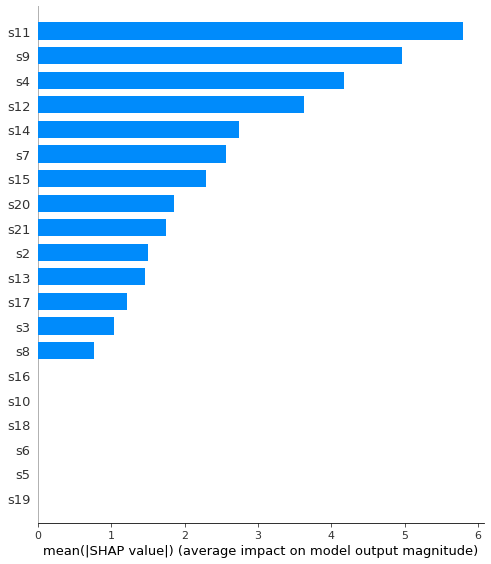

In [22]:
shap_values = shap.TreeExplainer(gb_reg).shap_values(test1_df[features])
shap.summary_plot(shap_values, train1_df[features], plot_type="bar")

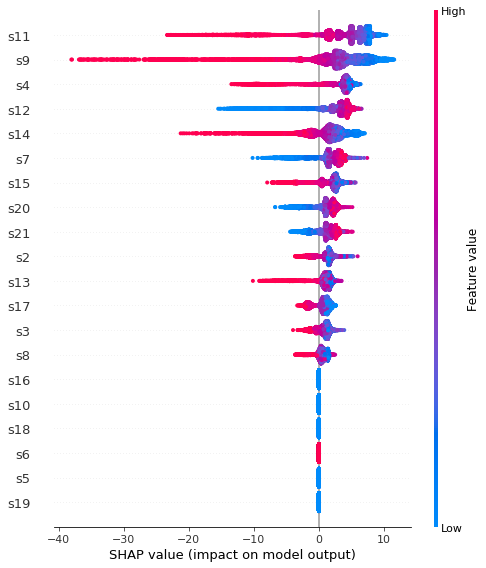

In [24]:
shap.summary_plot(shap_values, features=test1_df[features], feature_names= features)

> Local Interpretability (Example for Engine ID 90)

In [43]:
shap_plot(90)

## Start Modelling for FD002 (Dataset 2)

In [39]:
seq_gen = (list(gen_sequence(train2_df[train2_df['id']==id], sequence_length, sequence_cols)) 
           for id in train2_df['id'].unique())

# Generate a sequence with the gen_sequence function to get the 3-Dimensional Form 
# Convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

In [40]:
# Function to generate the RUL labels 
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

# Generate the labels using the gen_labels function
label_gen = [gen_labels(train2_df[train2_df['id']==id], sequence_length, ['RUL']) 
             for id in train2_df['id'].unique()]
# Convert to numpy array
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(40759, 1)

## 3. Model Building

* 3a. Defining R2 to be used as an evaluation metric
> R2 is a statistical measures which gives an indication of closeness of fit.

In [41]:
# Defining R2 to be used as an evaluation metric in the Deep Learning Model Evaluation Metrics
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Deep Learning Architecture and Topology

* 3b. Deep Learning Architecture consists of:
<br> > Sequential Model
<br> > Bi-LSTM Layer
<br> > LSTM Layer
<br> > Dropout Layers

In [42]:
# Building the Deep Learning Architecture

# Defining the features to be fed into the input of the layers in the Deep Learning Model
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# Sequential Model
model = Sequential()
# Add a Bi-LSTM Layer
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(sequence_length, nb_features)))
# Add a Dropout Layer after the Bi-LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Add a LSTM Layer
model.add(LSTM(units=50,return_sequences=False, activation = 'tanh'))
# Add a Dropout Layer after the LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Dense Layer
model.add(Dense(units=nb_out))
# Activation Function 
model.add(Activation("linear"))
# Compile model, set metrics for evaluation
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae','mse',r2_keras])
# For model observation
print(model.summary())

# Fit the Deep Learning network on our training data, early stopping is also applied
history = model.fit(seq_array, label_array, epochs=100, batch_size=10, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 50, 40)            7360      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                18200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
__________________________________________________

* 3c. Training Data Metrics

In [43]:
# Metrics from fitting the model on our Training Data
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nMSE: {}'.format(scores[2]))
print('\nR^2: {}'.format(scores[3]))


204/204 [==============================] - 1s 7ms/step - loss: 179.2374 - mae: 10.2216 - mse: 179.2374 - r2_keras: 0.8638

MAE: 10.221564292907715

MSE: 179.23739624023438

R^2: 0.8637569546699524


* 3d. Preparation of Test Data to feed into our model for evaluation

In [44]:
# Preparing Test Data to be fed into our model for evaluation
seq_array_test_last = [test2_df[test2_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test2_df['id'].unique() if len(test2_df[test2_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

In [45]:
# Preparing Test Data to be fed into our model for evaluation
y_mask = [len(test2_df[test2_df['id']==id]) >= sequence_length for id in test2_df['id'].unique()]
label_array_test_last = test2_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

* 3e. Testing Data Metrics

In [46]:
# Test Data Metrics after running our model
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose = 1, batch_size = 200)
print('\nMAE: {}'.format(scores_test[1]))
print('\nMSE: {}'.format(scores_test[2]))
print('\nRMSE:')
print(math.sqrt(scores_test[2]))
print('\nR2: {}'.format(scores_test[3]))

2/2 [==============================] - 0s 11ms/step - loss: 206.6912 - mae: 10.4490 - mse: 206.6912 - r2_keras: 0.8730

MAE: 10.44897174835205

MSE: 206.6912078857422

RMSE:
14.376759297064906

R2: 0.8729592561721802


## Predicted Values

In [47]:
# To obtain our model's prediction on the Test Data
scores_test = model.predict(seq_array_test_last)
scores_test

array([[ 17.21169  ],
       [117.711624 ],
       [105.323135 ],
       [101.940384 ],
       [ 11.411739 ],
       [123.052536 ],
       [ 11.997244 ],
       [ 66.65427  ],
       [ 12.48432  ],
       [114.6633   ],
       [ 11.97789  ],
       [121.554825 ],
       [ 33.043274 ],
       [ 16.247704 ],
       [ 43.00514  ],
       [ 88.74921  ],
       [ 72.150055 ],
       [ 29.690392 ],
       [ 72.549225 ],
       [100.71509  ],
       [ 18.103704 ],
       [ 89.847824 ],
       [ 82.90082  ],
       [117.89659  ],
       [115.32515  ],
       [ 97.77292  ],
       [ 62.83395  ],
       [ 97.45949  ],
       [ 14.354083 ],
       [ 67.06311  ],
       [119.83354  ],
       [ 88.602875 ],
       [ 80.83121  ],
       [ 68.38105  ],
       [ 51.623985 ],
       [ 33.989716 ],
       [ 31.801086 ],
       [ 32.19795  ],
       [ 18.115723 ],
       [ 11.878958 ],
       [ 21.931004 ],
       [116.31552  ],
       [119.71135  ],
       [ 18.169655 ],
       [123.42978  ],
       [ 1

## SHAP Interpretation

> Global Interpretability (Test Set 2)

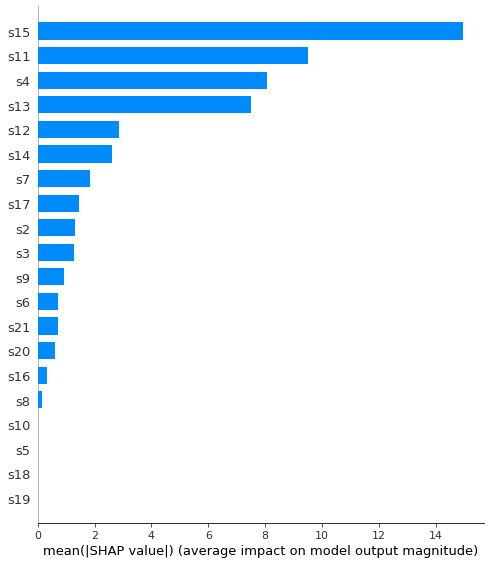

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0, criterion='friedman_mse')
gb_reg.fit(train2_df[features], train2_df['RUL'])

shap_values = shap.TreeExplainer(gb_reg).shap_values(test2_df[features])
shap.summary_plot(shap_values, train2_df[features], plot_type="bar")

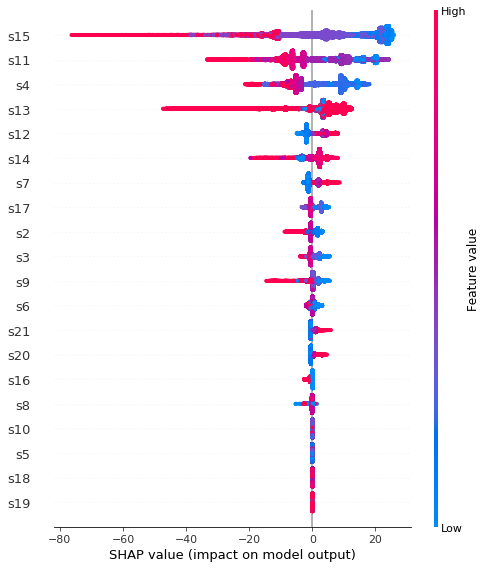

In [31]:
shap.summary_plot(shap_values, features=test2_df[features], feature_names= features)

> Local Interpretability (Example Engine ID)

In [44]:
def shap_plot(j):
    S = test2_df[features] 
    explainerModel = shap.TreeExplainer(gb_reg)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(90)

## Start Modelling for FD003 (Dataset 3)

In [48]:
seq_gen = (list(gen_sequence(train3_df[train3_df['id']==id], sequence_length, sequence_cols)) 
           for id in train3_df['id'].unique())

# Generate a sequence with the gen_sequence function to get the 3-Dimensional Form 
# Convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

In [49]:
# Function to generate the RUL labels 
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

# Generate the labels using the gen_labels function
label_gen = [gen_labels(train3_df[train3_df['id']==id], sequence_length, ['RUL']) 
             for id in train3_df['id'].unique()]
# Convert to numpy array
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(19720, 1)

## 3. Model Building

* 3a. Defining R2 to be used as an evaluation metric
> R2 is a statistical measures which gives an indication of closeness of fit.

In [50]:
# Defining R2 to be used as an evaluation metric in the Deep Learning Model Evaluation Metrics
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Deep Learning Architecture and Topology

* 3b. Deep Learning Architecture consists of:
<br> > Sequential Model
<br> > Bi-LSTM Layer
<br> > LSTM Layer
<br> > Dropout Layers

In [51]:
# Building the Deep Learning Architecture

# Defining the features to be fed into the input of the layers in the Deep Learning Model
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# Sequential Model
model = Sequential()
# Add a Bi-LSTM Layer
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(sequence_length, nb_features)))
# Add a Dropout Layer after the Bi-LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Add a LSTM Layer
model.add(LSTM(units=50,return_sequences=False, activation = 'tanh'))
# Add a Dropout Layer after the LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Dense Layer
model.add(Dense(units=nb_out))
# Activation Function 
model.add(Activation("linear"))
# Compile model, set metrics for evaluation
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae','mse',r2_keras])
# For model observation
print(model.summary())

# Fit the Deep Learning network on our training data, early stopping is also applied
history = model.fit(seq_array, label_array, epochs=100, batch_size=10, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 50, 40)            7360      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                18200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
__________________________________________________

* 3c. Training Data Metrics

In [52]:
# Metrics from fitting the model on our Training Data
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nMSE: {}'.format(scores[2]))
print('\nR^2: {}'.format(scores[3]))


99/99 [==============================] - 1s 7ms/step - loss: 66.4785 - mae: 5.2333 - mse: 66.4785 - r2_keras: -129386352.0000

MAE: 5.233305931091309

MSE: 66.47845458984375

R^2: -129386352.0


* 3d. Preparation of Test Data to feed into our model for evaluation

In [53]:
# Preparing Test Data to be fed into our model for evaluation
seq_array_test_last = [test3_df[test3_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test3_df['id'].unique() if len(test3_df[test3_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

In [54]:
# Preparing Test Data to be fed into our model for evaluation
y_mask = [len(test3_df[test3_df['id']==id]) >= sequence_length for id in test3_df['id'].unique()]
label_array_test_last = test3_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

* 3e. Testing Data Metrics

In [55]:
# Test Data Metrics after running our model
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose = 1, batch_size = 200)
print('\nMAE: {}'.format(scores_test[1]))
print('\nMSE: {}'.format(scores_test[2]))
print('\nRMSE:')
print(math.sqrt(scores_test[2]))
print('\nR2: {}'.format(scores_test[3]))

1/1 [==============================] - 0s 27ms/step - loss: 134.8845 - mae: 7.7826 - mse: 134.8845 - r2_keras: 0.9103

MAE: 7.7826247215271

MSE: 134.88446044921875

RMSE:
11.613976943718235

R2: 0.9102503657341003


# Predicted Values

In [56]:
# To obtain our model's prediction on the Test Data
scores_test = model.predict(seq_array_test_last)
scores_test

array([[ 48.436153 ],
       [ 57.07217  ],
       [ 27.012762 ],
       [120.51873  ],
       [100.12328  ],
       [116.63263  ],
       [ 72.41417  ],
       [ 73.4801   ],
       [ 72.646    ],
       [ 72.30218  ],
       [ 99.22368  ],
       [106.05203  ],
       [113.527374 ],
       [ 34.910446 ],
       [112.31923  ],
       [ 60.006824 ],
       [122.11836  ],
       [121.93682  ],
       [119.441956 ],
       [ 54.661667 ],
       [ 20.888296 ],
       [123.891594 ],
       [ 79.32305  ],
       [ 10.856264 ],
       [ 63.68854  ],
       [ 16.862486 ],
       [118.051476 ],
       [123.619995 ],
       [114.86819  ],
       [ 88.46875  ],
       [ 93.534744 ],
       [ 63.048042 ],
       [ 86.18097  ],
       [104.011024 ],
       [ 96.56075  ],
       [119.311264 ],
       [ 26.888672 ],
       [  7.751997 ],
       [ 39.904865 ],
       [124.483246 ],
       [106.436226 ],
       [111.33214  ],
       [ 74.48852  ],
       [123.796844 ],
       [  9.559583 ],
       [11

## SHAP Interpretation

> Global Interpretability

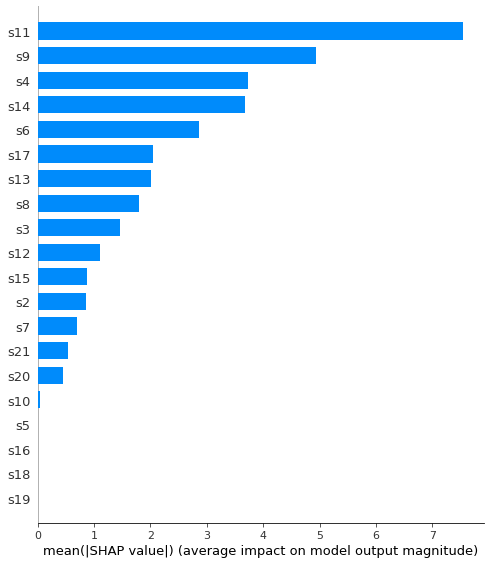

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0, criterion='friedman_mse')
gb_reg.fit(train3_df[features], train3_df['RUL'])

shap_values = shap.TreeExplainer(gb_reg).shap_values(test3_df[features])
shap.summary_plot(shap_values, train3_df[features], plot_type="bar")

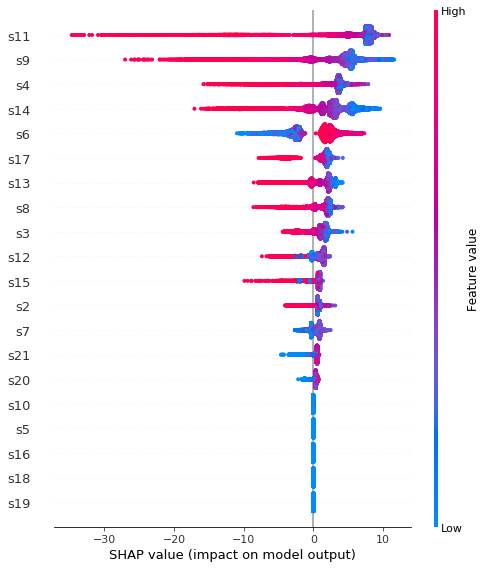

In [36]:
shap.summary_plot(shap_values, features=test3_df[features], feature_names= features)

> Local Interpretability (Example Engine ID 90)

In [45]:
def shap_plot(j):
    S = test3_df[features] 
    explainerModel = shap.TreeExplainer(gb_reg)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(90)

## Start Modelling for FD004 (Dataset 4)

In [57]:
seq_gen = (list(gen_sequence(train4_df[train4_df['id']==id], sequence_length, sequence_cols)) 
           for id in train4_df['id'].unique())

# Generate a sequence with the gen_sequence function to get the 3-Dimensional Form 
# Convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)

In [58]:
# Function to generate the RUL labels 
def gen_labels(id_df, seq_length, label):
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

# Generate the labels using the gen_labels function
label_gen = [gen_labels(train4_df[train4_df['id']==id], sequence_length, ['RUL']) 
             for id in train4_df['id'].unique()]
# Convert to numpy array
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(48799, 1)

## 3. Model Building

* 3a. Defining R2 to be used as an evaluation metric
> R2 is a statistical measures which gives an indication of closeness of fit.

In [59]:
# Defining R2 to be used as an evaluation metric in the Deep Learning Model Evaluation Metrics
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## Deep Learning Architecture and Topology

* 3b. Deep Learning Architecture consists of:
<br> > Sequential Model
<br> > Bi-LSTM Layer
<br> > LSTM Layer
<br> > Dropout Layers

In [60]:
# Building the Deep Learning Architecture

# Defining the features to be fed into the input of the layers in the Deep Learning Model
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# Sequential Model
model = Sequential()
# Add a Bi-LSTM Layer
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(sequence_length, nb_features)))
# Add a Dropout Layer after the Bi-LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Add a LSTM Layer
model.add(LSTM(units=50,return_sequences=False, activation = 'tanh'))
# Add a Dropout Layer after the LSTM Layer to minimize overfitting  
model.add(Dropout(0.2))
# Dense Layer
model.add(Dense(units=nb_out))
# Activation Function 
model.add(Activation("linear"))
# Compile model, set metrics for evaluation
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae','mse',r2_keras])
# For model observation
print(model.summary())

# Fit the Deep Learning network on our training data, early stopping is also applied
history = model.fit(seq_array, label_array, epochs=100, batch_size=10, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 50, 40)            7360      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                18200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
__________________________________________________

* 3c. Training Data Metrics

In [61]:
# Metrics from fitting the model on our Training Data
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('\nMAE: {}'.format(scores[1]))
print('\nMSE: {}'.format(scores[2]))
print('\nR^2: {}'.format(scores[3]))


244/244 [==============================] - 3s 8ms/step - loss: 177.6508 - mae: 9.1428 - mse: 177.6508 - r2_keras: -949122240.0000

MAE: 9.142804145812988

MSE: 177.65078735351562

R^2: -949122240.0


* 3d. Preparation of Test Data to feed into our model for evaluation

In [62]:
# Preparing Test Data to be fed into our model for evaluation
seq_array_test_last = [test4_df[test4_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test4_df['id'].unique() if len(test4_df[test4_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

In [63]:
# Preparing Test Data to be fed into our model for evaluation
y_mask = [len(test4_df[test4_df['id']==id]) >= sequence_length for id in test4_df['id'].unique()]
label_array_test_last = test4_df.groupby('id')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

* 3e. Testing Data Metrics

In [64]:
# Test Data Metrics after running our model
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose = 1, batch_size = 200)
print('\nMAE: {}'.format(scores_test[1]))
print('\nMSE: {}'.format(scores_test[2]))
print('\nRMSE:')
print(math.sqrt(scores_test[2]))
print('\nR2: {}'.format(scores_test[3]))

2/2 [==============================] - 0s 11ms/step - loss: 250.1741 - mae: 11.0894 - mse: 250.1741 - r2_keras: 0.8500

MAE: 11.089444160461426

MSE: 250.1741180419922

RMSE:
15.816893438409206

R2: 0.8499964475631714


# Predicted Values

In [65]:
# To obtain our model's prediction on the Test Data
scores_test = model.predict(seq_array_test_last)
scores_test

array([[ 29.080185 ],
       [ 52.346947 ],
       [112.67549  ],
       [ 71.822365 ],
       [115.254616 ],
       [115.09222  ],
       [118.607574 ],
       [ 15.954175 ],
       [113.55596  ],
       [121.93168  ],
       [ 12.3877735],
       [ 78.630646 ],
       [ 87.45328  ],
       [ 20.36472  ],
       [116.643974 ],
       [112.00534  ],
       [ 88.45602  ],
       [ 77.534164 ],
       [ 98.08247  ],
       [ 12.6991005],
       [ 26.00375  ],
       [107.78147  ],
       [ 48.339046 ],
       [ 93.71492  ],
       [ 50.749146 ],
       [ 84.864525 ],
       [115.01509  ],
       [  8.279421 ],
       [ 28.43695  ],
       [121.74033  ],
       [108.06415  ],
       [ 33.911465 ],
       [ 62.681705 ],
       [ 73.41527  ],
       [  7.5769997],
       [ 89.20286  ],
       [ 13.759588 ],
       [108.55032  ],
       [ 31.700512 ],
       [ 72.12372  ],
       [ 53.56328  ],
       [117.02004  ],
       [ 36.421642 ],
       [ 49.91694  ],
       [ 27.847187 ],
       [ 8

## SHAP Interpretation

> Global Interpretability 

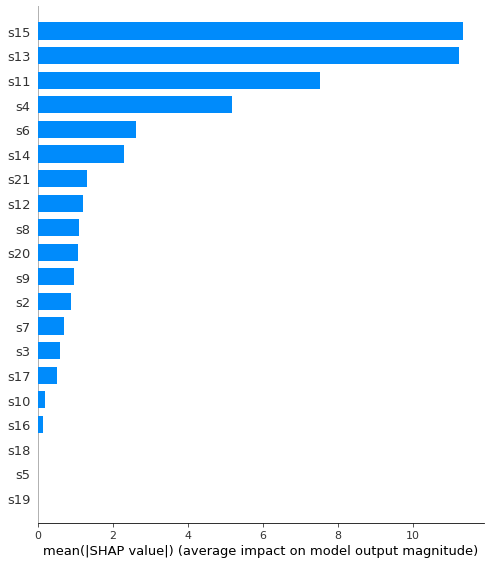

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=0, criterion='friedman_mse')
gb_reg.fit(train4_df[features], train4_df['RUL'])

shap_values = shap.TreeExplainer(gb_reg).shap_values(test4_df[features])
shap.summary_plot(shap_values, train4_df[features], plot_type="bar")

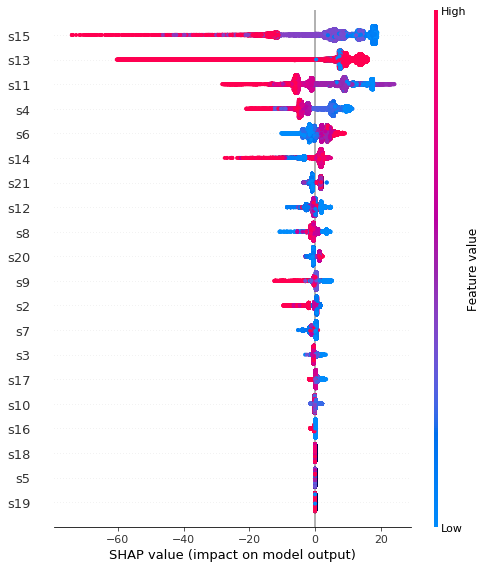

In [40]:
shap.summary_plot(shap_values, features=test4_df[features], feature_names= features)

> Local Interpretability (Example Engine ID 90)

In [46]:
def shap_plot(j):
    S = test4_df[features] 
    explainerModel = shap.TreeExplainer(gb_reg)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap_plot(90)